## <center> RĪGAS TEHNISKĀ UNIVERSITĀTE

### <center>DATORZINĀTNES UN INFORMĀCIJAS TEHNOLOĢIJAS FAKULTĀTE


### <center>Datorgrafikas un attēlu apstrādes pamati
<br> <hr>
#### Praktiskā darba Nr. 5
#### Vārds, Uzvārds: Gļebs Ostapko
#### Studenta apliecības nummurs: 231RDB186



----

## <center> 5.Individuālais uzdevums
    
Realizēt 2 dažādus attēlu pārklāšanās režīmus (piemēram, "Mīkstas gaismas režīmu" un "Iededzināšanas režīmu") balstoties uz Jūsu studentu apliecības numura pēdējiem 3 cipariem. Variantu saraksts pieejams ORTUS vidē pie 7.praktiskās nodarbības apraksta. 
<br>
<br>
<br>
   
<br>
<br>
Uzdevuma izpildes izvadei jāsastāv no abiem brīvi izvēlētiem ievades attēliem un realizētā pārklāšanās režīma rezultāta. <br> 
Katra pārklāšanās režīma izvade sastāv no 3 attēliem : <i> attels_1, attels_2, rezultats</i>

----
## <center> Burn/Color Burn



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


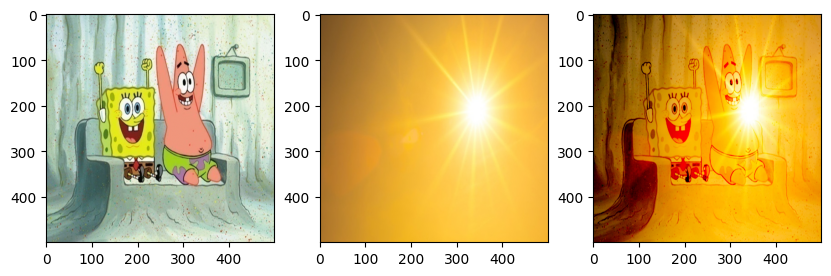

In [1]:
### Python pakotņu importēšana
#====================================
#darbībam ar masīviem
import numpy as np
from numpy import asarray

#attēlu apstrādei
import cv2
from PIL import Image

#atvērt/parādīt attēlus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#Attēlu krāsu sistēmas un attēla izmēra maiņa  
#====================================
attels_1 = 'bob.jpg'
attels_2 = 'sun_light.jpg'
#atvērt attēlu
image_A = cv2.imread(attels_1)
image_B = cv2.imread(attels_2)

#mainīt no BGR uz RGB nolasi dēļ OpenCV 
im_rgb_A = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB)
im_rgb_B = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)

#Mērogot attēlus, lai tie būtu vienāda izmēra
resized_img_A = cv2.resize(image_A, (500,500))
resized_img_B = cv2.resize(image_B, (500,500))

#Saglabāt mērogotos attēlus
cv2.imwrite(attels_1, resized_img_A)
cv2.imwrite(attels_2, resized_img_B)

#Read the image data as an array + normalize the values
#====================================

# atvērt attēlu
image_A = Image.open(attels_1)
image_B = Image.open(attels_2)

# pārveidot attēlu par numpy masīvu
data_A = asarray(image_A)
data_B = asarray(image_B)

# izveidot Pillow attēlu no ievades datiem
image_array_A = Image.fromarray(data_A)
image_array_B = Image.fromarray(data_B)

#normalizēt datu vērtības robežā no 0 līdz 1
image_norm_A = data_A/255.0
image_norm_B = data_B/255.0



#Iededzinasana
#====================================
# C = 1-((1-B)/A)
#====================================
image_norm_A = np.clip(image_norm_A, 0.0001, 1)

burn = 1-((1-image_norm_B)/image_norm_A)


fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_norm_B)
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(burn)

----
## <center> Hard Light

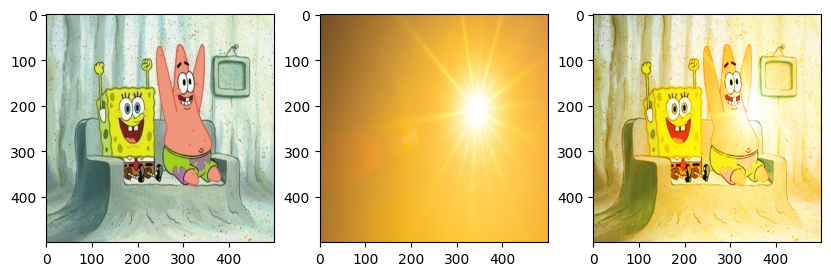

In [2]:
### Python pakotņu importēšana
#====================================
#darbībam ar masīviem
import numpy as np
from numpy import asarray

#attēlu apstrādei
import cv2
from PIL import Image

#atvērt/parādīt attēlus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#Attēlu krāsu sistēmas un attēla izmēra maiņa  
#====================================
attels_1 = 'bob.jpg'
attels_2 = 'sun_light.jpg'
#atvērt attēlu
image_A = cv2.imread(attels_1)
image_B = cv2.imread(attels_2)

#mainīt no BGR uz RGB nolasi dēļ OpenCV 
im_rgb_A = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB)
im_rgb_B = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)

#Mērogot attēlus, lai tie būtu vienāda izmēra
resized_img_A = cv2.resize(image_A, (500,500))
resized_img_B = cv2.resize(image_B, (500,500))

#Saglabāt mērogotos attēlus
cv2.imwrite(attels_1, resized_img_A)
cv2.imwrite(attels_2, resized_img_B)

#Read the image data as an array + normalize the values
#====================================

# atvērt attēlu
image_A = Image.open(attels_1)
image_B = Image.open(attels_2)

# pārveidot attēlu par numpy masīvu
data_A = asarray(image_A)
data_B = asarray(image_B)

# izveidot Pillow attēlu no ievades datiem
image_array_A = Image.fromarray(data_A)
image_array_B = Image.fromarray(data_B)

#normalizēt datu vērtības robežā no 0 līdz 1
image_norm_A = data_A/255.0
image_norm_B = data_B/255.0

#Hard light režims
#====================================
#if A<= 0.5 then C=2*A*B
#if A > 0.5 then C=1-2 * (1-A) * (1-B)

overlay = np.where(image_norm_A <= 0.5, 2 * image_norm_A * image_norm_B, 1-2 * (1-image_norm_A) * (1-image_norm_B))
overlay = np.clip(overlay, 0, 1)

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_norm_B)
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(overlay)
